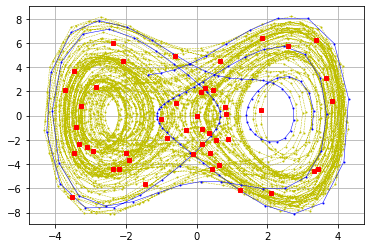

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def RK2(f,u,times,subdiv = 1):
     uout = np.zeros((len(times),)+u.shape)
     uout[0] = u;
     for k in range(len(times)-1):
         t = times[k]
         h = (times[k+1]-times[k])/subdiv
         for j in range(subdiv):
            k1 = f(u,t)*h
            k2 = f(u+0.5*k1, t+0.5*h)*h
            u, t = u+k2, t+h
         uout[k+1]=u
     return uout

def plotphase(A,B,C,D,E):
     def derivs(u,t): y,z = u; return np.array([ z, -A*y**3 + B*y - C*z + D*np.cos(E*t) ])
     N=60
     u0 = np.array([0.0, 0.0])
     t  = np.arange(0,300,2*np.pi/N); 
     u  = RK2(derivs, u0, t, subdiv = 10)
     plt.plot(u[:-2*N,0],u[:-2*N,1],'.--y', u[-2*N:,0],u[-2*N:,1], '.-b', lw=0.5, ms=2);
     plt.plot(u[::N,0],u[::N,1],'rs', ms=4); plt.grid(); plt.show()
     return u

l = plotphase(1.0, 5.0, 0.02, 8.0, 0.5)

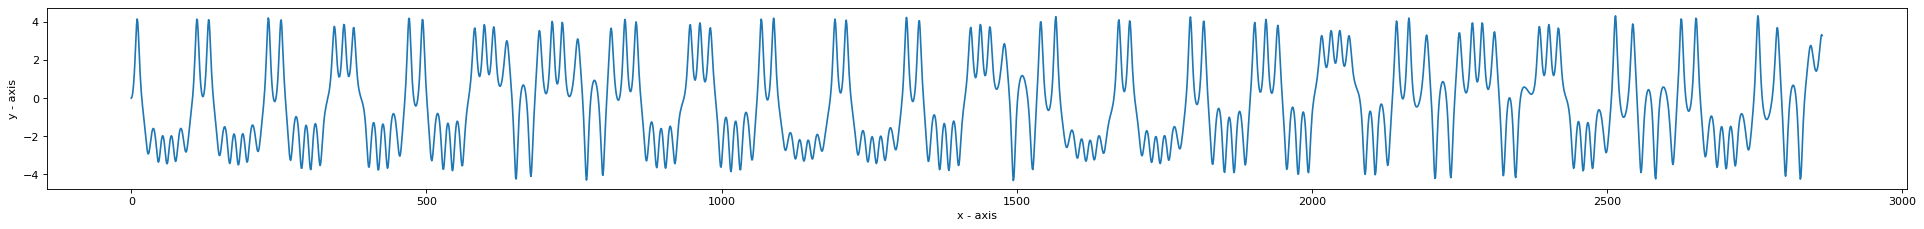

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
  
a=range(0,2865)
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 3), dpi=80, facecolor='w', edgecolor='k')  
# plotting the points  
plt.plot(a, l[:,0]) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
   
  
# function to show the plot 
plt.show() 

In [ ]:
test_data_size = 410
all_data=l[:,0]
train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

test error: 
3.7947839382669186


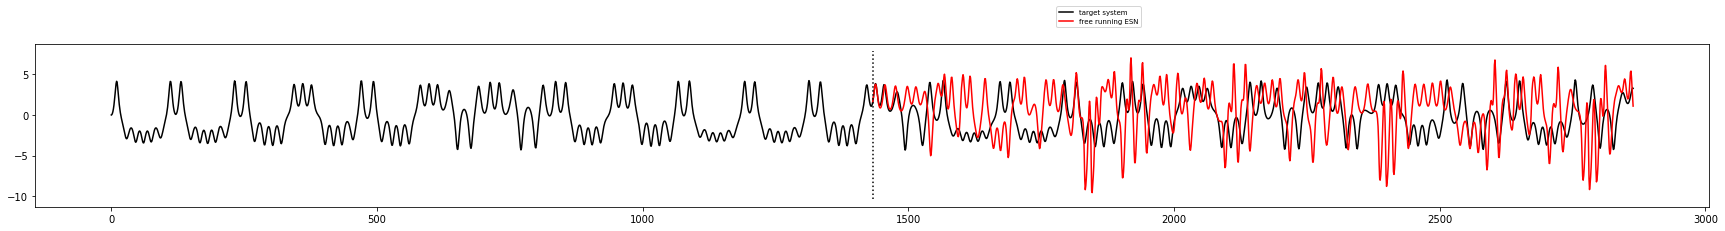

In [ ]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data =all_data 
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 700,
          spectral_radius = 1,
          random_state=42)

trainlen = 1433
future = 1432
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(30,3))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = all_data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: ignored

In [ ]:
train_data.shape

(2455,)

In [ ]:
all_data.shape

(2865,)